In [190]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.image as mpimg
import os

In [191]:
olympic_data = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')
olympic_data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


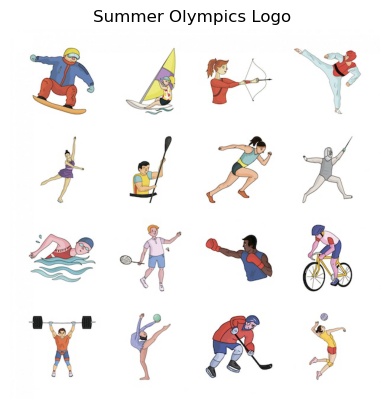

In [192]:
image_path = 'SummerOlympicsLogo.jpeg'

if os.path.exists(image_path):
    # Load the image
    img = mpimg.imread(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off') # Hide axes
    plt.title('Summer Olympics Logo ')
    plt.show()
else:
    print(f"Error: Image file not found at {image_path}")

In [193]:
olympic_data.shape

(15433, 11)

In [194]:
# Rows with null values
olympic_data[olympic_data.isnull().any(axis=1)]

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
# Drop null values
olympic_data.dropna(inplace=True)

In [196]:
# Last five rows
olympic_data.tail()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold
15432,Beijing,2008.0,Wrestling,Wrestling Gre-R,96 - 120kg,"LOPEZ, Mijain",Men,CUB,Cuba,M,Gold


In [197]:
# Show duplicated rows
print("Duplicated row(s):")
display(olympic_data[olympic_data.duplicated(keep=False)])

Duplicated row(s):


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
2288,Moscow,1980.0,Hockey,Hockey,hockey,"SINGH, Singh",Men,IND,India,M,Gold
2320,Moscow,1980.0,Hockey,Hockey,hockey,"SINGH, Singh",Men,IND,India,M,Gold


In [198]:
olympic_data.drop_duplicates(inplace=True)

In [199]:
print(olympic_data.dtypes)

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object


In [200]:
# Change datatype of 'Year' column
olympic_data['Year'] = olympic_data['Year'].astype(int).astype(str)
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15315 non-null  object
 1   Year          15315 non-null  object
 2   Sport         15315 non-null  object
 3   Discipline    15315 non-null  object
 4   Event         15315 non-null  object
 5   Athlete       15315 non-null  object
 6   Gender        15315 non-null  object
 7   Country_Code  15315 non-null  object
 8   Country       15315 non-null  object
 9   Event_gender  15315 non-null  object
 10  Medal         15315 non-null  object
dtypes: object(11)
memory usage: 1.4+ MB


In [201]:
# No of Rows and Columns
print("Number of Rows:", olympic_data.shape[0])
print("Number of Columns:", olympic_data.shape[1])

Number of Rows: 15315
Number of Columns: 11


In [202]:
# Cities hosted olympics
olympic_data['City'].unique()

array(['Montreal', 'Moscow', 'Los Angeles', 'Seoul', 'Barcelona',
       'Atlanta', 'Sydney', 'Athens', 'Beijing'], dtype=object)

In [203]:
# Athletes who participated in most years
athlete_year_counts = olympic_data.groupby('Athlete')['Year'].nunique().reset_index()
athlete_year_counts.columns = ['Athlete', 'Years_Participated']
top_athletes_by_years = athlete_year_counts.sort_values(by='Years_Participated', ascending=False)

print("Athletes who participated in the most years:")
display(top_athletes_by_years.head(10))

Athletes who participated in the most years:


,Athlete,Years_Participated
5789,"LIPA, Elisabeta",6
2776,"FISCHER, Birgit",6
9753,"TANI, Ryoko",5
10073,"TRILLINI, Giovanna",5
7414,"OTTEY-PAGE, Merlene",5
8708,"SAUTIN, Dmitry",5
4140,"IGNAT, Doina",5
2451,"EDWARDS, Teresa",5
8834,"SCHUMANN, Ralf",5
4132,"IDEM, Josefa",5


In [204]:
# Athletes who participated in all the given years from 1976 to 2008
unique_years = olympic_data['Year'].nunique()
athletes_in_all_years = athlete_year_counts[athlete_year_counts['Years_Participated'] == unique_years]

print(f"Athletes who participated in all {unique_years} years:")
if athletes_in_all_years.empty:
    print("No athletes participated in all years.")
else:
    display(athletes_in_all_years)

Athletes who participated in all 9 years:
No athletes participated in all years.


In [205]:
# Medal category counts
medal_counts = olympic_data['Medal'].value_counts()
medal_counts

Medal
Bronze    5258
Gold      5041
Silver    5016
Name: count, dtype: int64

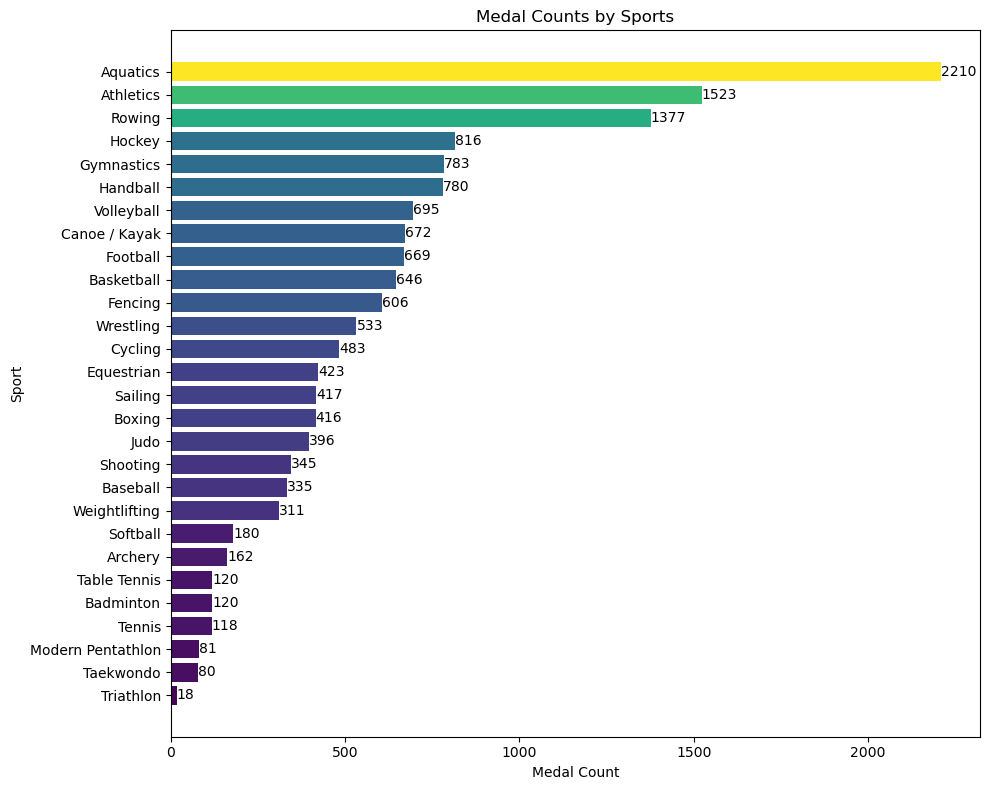

In [206]:
# Medal counts by sports
sports_medal_counts = olympic_data['Sport'].value_counts().reset_index()
sports_medal_counts.columns = ['Sport', 'Medal_Count']

plt.figure(figsize=(10, 8))
cmap = plt.cm.viridis
colors = cmap(sports_medal_counts['Medal_Count'] / float(sports_medal_counts['Medal_Count'].max()))
bars = plt.barh(y='Sport', width='Medal_Count', data=sports_medal_counts, color=colors)
plt.xlabel('Medal Count')
plt.ylabel('Sport')
plt.title('Medal Counts by Sports')
plt.tight_layout()
plt.gca().invert_yaxis()

# Adding medal counts to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.show()

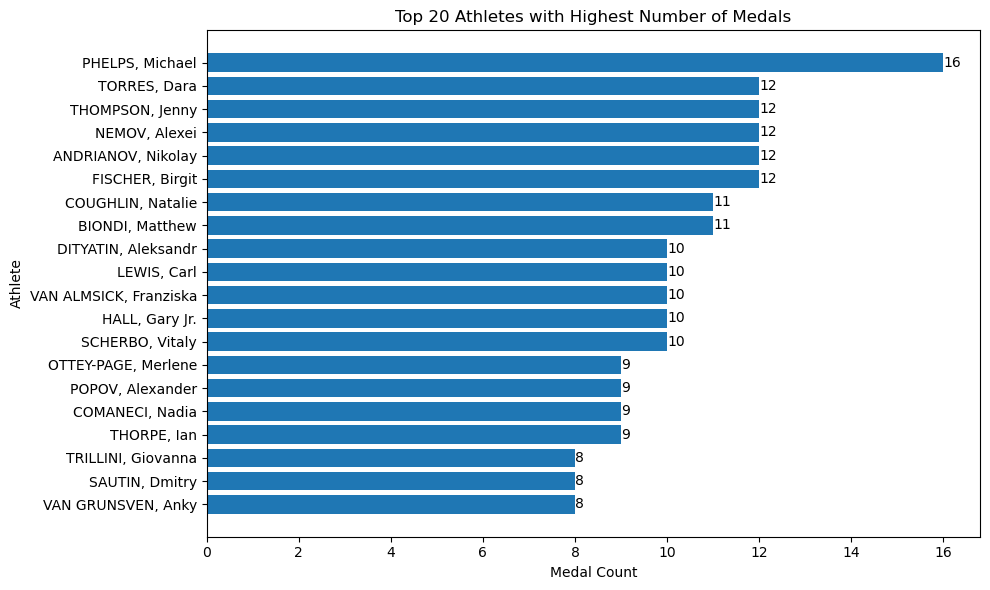

In [207]:
# Top 20 athletes with highest number of medals
top_athletes = olympic_data['Athlete'].value_counts().head(20).reset_index()
top_athletes.columns = ['Athlete', 'Medal_Count']

plt.figure(figsize=(10, 6))
bars = plt.barh(y='Athlete', width='Medal_Count', data=top_athletes)
plt.xlabel('Medal Count')
plt.ylabel('Athlete')
plt.title('Top 20 Athletes with Highest Number of Medals')
plt.tight_layout()
plt.gca().invert_yaxis()
# Adding medal counts to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.show()

In [208]:
# Athlete with the most medals in each year
athlete_medals_by_year = olympic_data.groupby(['Year', 'Athlete']).size().reset_index(name='Medal_Count')

# The athlete with the most medals for each year
max_medals_per_year = athlete_medals_by_year.loc[athlete_medals_by_year.groupby('Year')['Medal_Count'].idxmax()]

print("Athlete with the most medals in each year:")
display(max_medals_per_year)

Athlete with the most medals in each year:


,Year,Athlete,Medal_Count
21,1976,"ANDRIANOV, Nikolay",7
1412,1980,"DITYATIN, Aleksandr",8
3091,1984,"LI, Ning",6
3841,1988,"BIONDI, Matthew",7
6323,1992,"SCHERBO, Vitaly",6
7698,1996,"NEMOV, Alexei",6
9492,2000,"NEMOV, Alexei",6
11427,2004,"PHELPS, Michael",8
13301,2008,"PHELPS, Michael",8


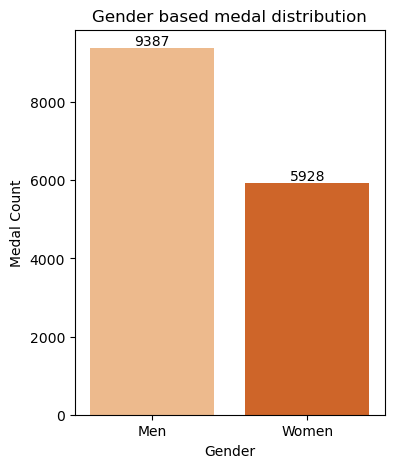

In [209]:
# Medal counts by gender
gender_medal_counts = olympic_data['Gender'].value_counts().reset_index()
gender_medal_counts.columns = ['Gender', 'Medal_Count']
gender_medal_counts
plt.figure(figsize=(4,5))
ax = sns.barplot(x='Gender', y='Medal_Count', data=gender_medal_counts, palette='Oranges')
plt.xlabel('Gender')
plt.ylabel('Medal Count')
plt.title('Gender based medal distribution')

# Adding medal counts to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

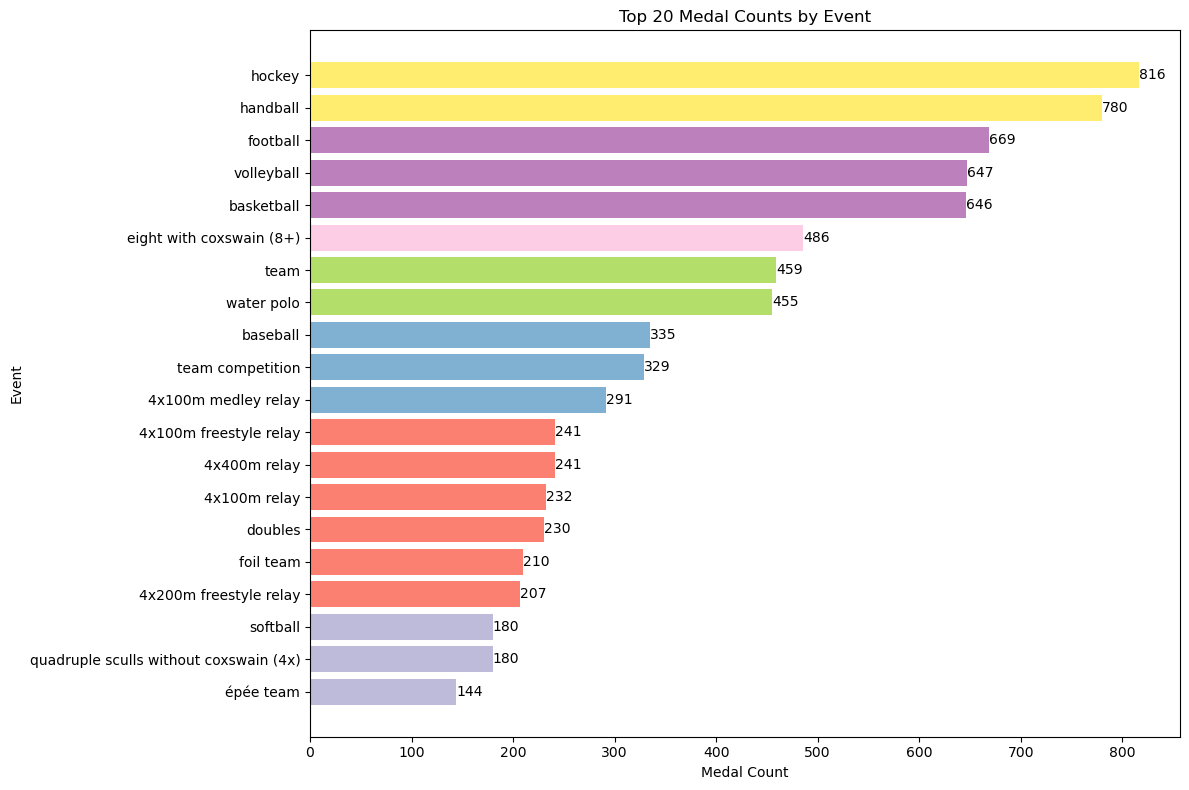

In [210]:
# Medal counts by event
event_medal_counts = olympic_data['Event'].value_counts().reset_index()
event_medal_counts.columns = ['Event', 'Medal_Count']

# Display the top 20 events by medal count
top_events = event_medal_counts.head(20)

plt.figure(figsize=(12, 8))
cmap = plt.cm.Set3
colors = cmap(top_events['Medal_Count'] / float(top_events['Medal_Count'].max()))
bars = plt.barh(y='Event', width='Medal_Count', data=top_events, color=colors)
plt.xlabel('Medal Count')
plt.ylabel('Event')
plt.title(f'Top 20 Medal Counts by Event')
plt.tight_layout()
plt.gca().invert_yaxis()

# Add medal counts to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.show()

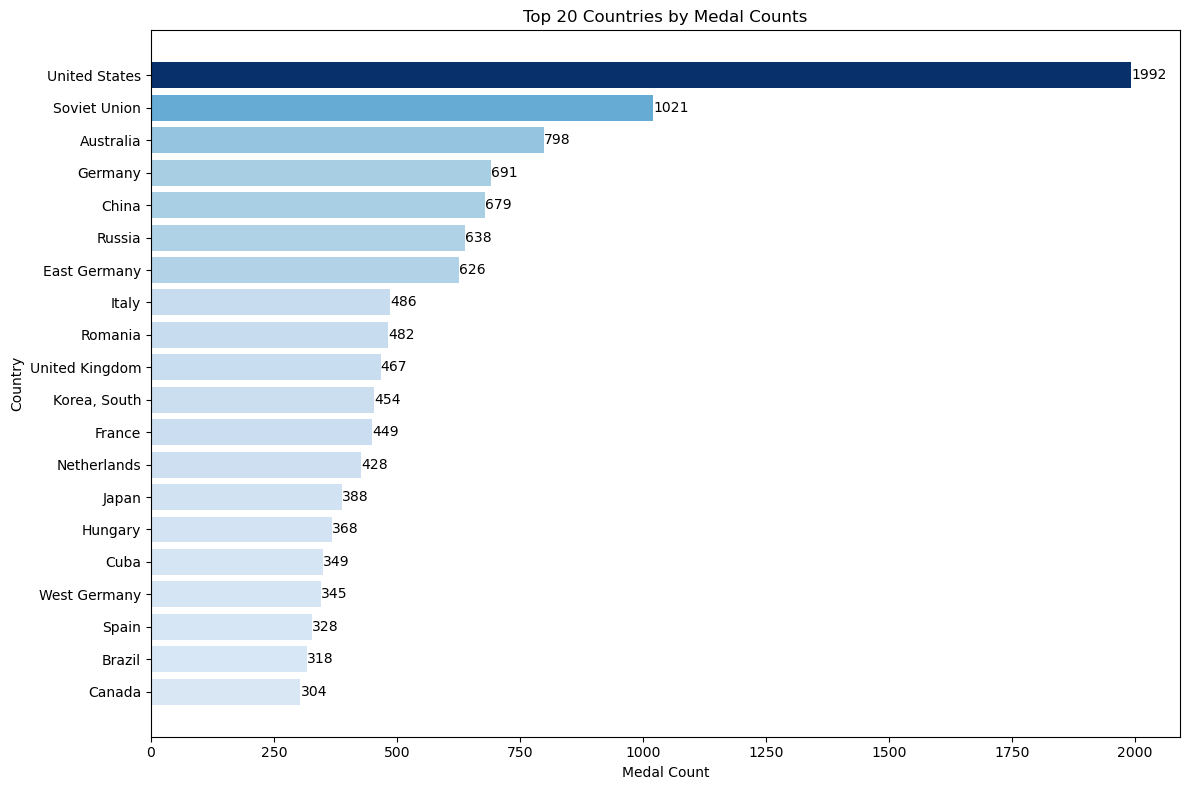

In [211]:
# Medal counts by country
country_medal_counts = olympic_data['Country'].value_counts().reset_index()
country_medal_counts.columns = ['Country', 'Medal_Count']

# Display the top 20 countries by medal count
top_countries = country_medal_counts.head(20)

plt.figure(figsize=(12, 8))
cmap = plt.cm.Blues
colors = cmap(top_countries['Medal_Count'] / float(top_countries['Medal_Count'].max()))
bars = plt.barh(y='Country', width='Medal_Count', data=top_countries, color=colors)
plt.xlabel('Medal Count')
plt.ylabel('Country')
plt.title('Top 20 Countries by Medal Counts')
plt.tight_layout()
plt.gca().invert_yaxis()

# Add medal counts to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.show()

   Year  Medal_Count
0  1976         1305
1  1980         1386
2  1984         1459
3  1988         1546
4  1992         1705
5  1996         1859
6  2000         2015
7  2004         1998
8  2008         2042


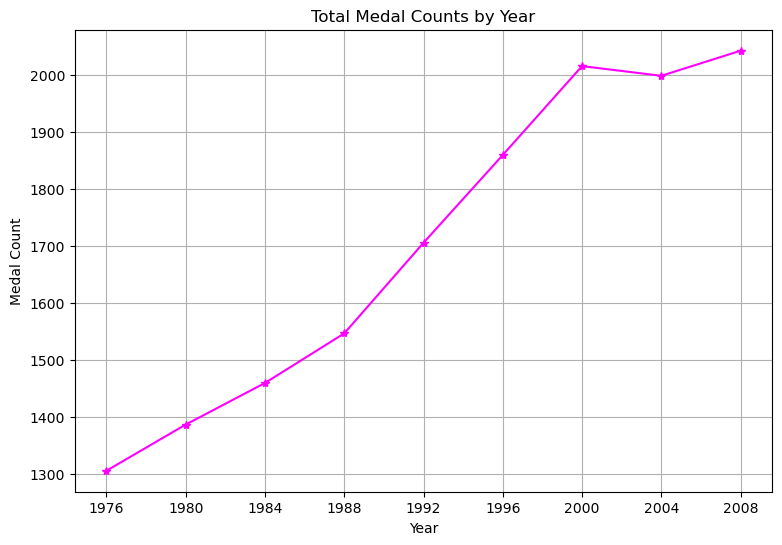

In [212]:
# Medal counts by year
year_medal_counts = olympic_data['Year'].value_counts().sort_index().reset_index()
year_medal_counts.columns = ['Year', 'Medal_Count']
print(year_medal_counts)
plt.figure(figsize=(9, 6))
plt.plot(year_medal_counts['Year'], year_medal_counts['Medal_Count'], marker='*', color ='magenta')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Total Medal Counts by Year')
plt.grid(True)
plt.show()

In [213]:
# Under each sports different diciplines are there by names with the count numbers
sports_disciplines = olympic_data.groupby('Sport')['Discipline'].unique().reset_index()
sports_discipline_counts = olympic_data.groupby('Sport')['Discipline'].nunique().reset_index()
sports_discipline_counts.columns = ['Sport', 'Discipline_Count']

print("Disciplines under each sport:\n")
for index, row in sports_disciplines.iterrows():
    sport_name = row['Sport']
    disciplines = ', '.join(row['Discipline'])
    discipline_count = sports_discipline_counts[sports_discipline_counts['Sport'] == sport_name]['Discipline_Count'].iloc[0]
    print(f"Sport: {sport_name} (Disciplines Count: {discipline_count})")
    print(f"Disciplines: {disciplines}\n")

Disciplines under each sport:

Sport: Aquatics (Disciplines Count: 4)
Disciplines: Diving, Swimming, Water polo, Synchronized S.

Sport: Archery (Disciplines Count: 1)
Disciplines: Archery

Sport: Athletics (Disciplines Count: 1)
Disciplines: Athletics

Sport: Badminton (Disciplines Count: 1)
Disciplines: Badminton

Sport: Baseball (Disciplines Count: 1)
Disciplines: Baseball

Sport: Basketball (Disciplines Count: 1)
Disciplines: Basketball

Sport: Boxing (Disciplines Count: 1)
Disciplines: Boxing

Sport: Canoe / Kayak (Disciplines Count: 2)
Disciplines: Canoe / Kayak F, Canoe / Kayak S

Sport: Cycling (Disciplines Count: 4)
Disciplines: Cycling Road, Cycling Track, Mountain Bike, BMX

Sport: Equestrian (Disciplines Count: 3)
Disciplines: Dressage, Eventing, Jumping

Sport: Fencing (Disciplines Count: 1)
Disciplines: Fencing

Sport: Football (Disciplines Count: 1)
Disciplines: Football

Sport: Gymnastics (Disciplines Count: 3)
Disciplines: Artistic G., Rhythmic G., Trampoline

Sport: H

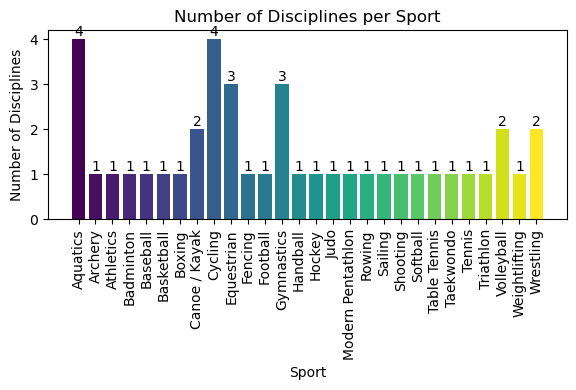

In [214]:
# Visualize the number of disciplines under each sport
plt.figure(figsize=(6, 4))
bars = plt.bar(x=sports_discipline_counts['Sport'], height=sports_discipline_counts['Discipline_Count'], color=plt.cm.viridis(np.linspace(0, 1, len(sports_discipline_counts))))
plt.xlabel('Sport')
plt.ylabel('Number of Disciplines')
plt.title('Number of Disciplines per Sport')
plt.xticks(rotation=90)
plt.tight_layout()

# Add discipline counts to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

In [215]:
# Seperated each group by gender, Men & Women and counted the total number of each gender by year - put them into their own data frame.
gender_grouped_by_men = olympic_data[['Year', 'Gender', 'Medal']] \
                        [olympic_data['Gender'] == 'Men'].groupby(['Year', 'Gender']).count().reset_index()
gender_grouped_by_women = olympic_data[['Year', 'Gender', 'Medal']] \
                        [olympic_data['Gender'] == 'Women'].groupby(['Year', 'Gender']).count().reset_index()

# Merged both dataframes into one and renamed the columns to easily identify for plotting
gender_medal_counts_by_year = pd.merge(gender_grouped_by_men, gender_grouped_by_women, on='Year', suffixes=('_Men', '_Women'))
gender_medal_counts_by_year.rename(columns={'Medal_Men': 'Medal_Count_Men','Medal_Women': 'Medal_Count_Women'}, inplace=True)

gender_medal_counts_by_year.drop(columns=['Gender_Men', 'Gender_Women'], inplace=True)
gender_medal_counts_by_year

,Year,Medal_Count_Men,Medal_Count_Women
0,1976,924,381
1,1980,957,429
2,1984,973,486
3,1988,1011,535
4,1992,1105,600
5,1996,1082,777
6,2000,1126,889
7,2004,1099,899
8,2008,1110,932


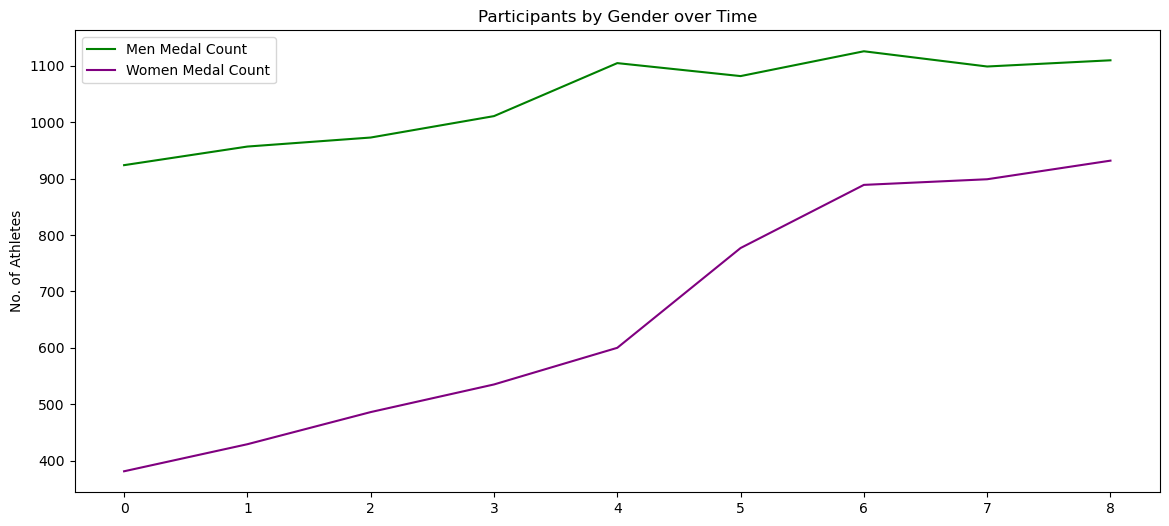

In [216]:
pd.merge(gender_grouped_by_men, gender_grouped_by_women, how='inner', on='Year', suffixes=('_men', '_women')).rename(columns={'Medal_men':'Men Medal Count', 'Medal_women':'Women Medal Count'}).plot(figsize=(14,6), color=['green', 'purple'])
plt.ylabel('No. of Athletes')
plt.title('Participants by Gender over Time');

In [217]:
# Gender wise sports counts
gender_sport_counts = olympic_data.groupby(['Sport', 'Gender']).size().unstack(fill_value=0)

# Sports where women's participation is greater than men's
sports_women_more_than_men = gender_sport_counts[gender_sport_counts['Women'] > gender_sport_counts['Men']]

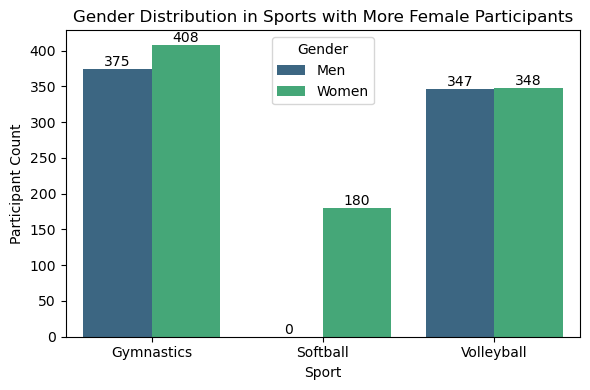

In [218]:
# Visualize sports with more female participants
sports_more_women = sports_women_more_than_men.reset_index().melt(id_vars='Sport', var_name='Gender', value_name='Participant_Count')

plt.figure(figsize=(6 , 4))
ax = sns.barplot(x='Sport', y='Participant_Count', hue='Gender', data=sports_more_women, palette='viridis')
plt.xlabel('Sport')
plt.ylabel('Participant Count')
plt.title('Gender Distribution in Sports with More Female Participants')
plt.tight_layout()

# Add participant counts to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

In [219]:
# Events that were made only for women
women_events_count = olympic_data[olympic_data['Gender'] == 'Women']['Event'].nunique()

print("Number of events that had only female participants:", women_events_count)

Number of events that had only female participants: 144


In [220]:
# Events that were made only for men
men_events_count = olympic_data[olympic_data['Gender'] == 'Men']['Event'].nunique()

print("Number of events that had only male participants:", men_events_count)

Number of events that had only male participants: 235


In [221]:
# Events with both male and female participants
men_events = olympic_data[olympic_data['Gender'] == 'Men']['Event'].unique()
women_events = olympic_data[olympic_data['Gender'] == 'Women']['Event'].unique()

# Intersection of events participated by men and women
events_with_both_genders = np.intersect1d(men_events, women_events)

# Count of such events
events_with_both_genders_count = len(events_with_both_genders)

print("Number of events that had both male and female participants:", events_with_both_genders_count)

Number of events that had both male and female participants: 86
